<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/blog/Neural_Networks_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks 101 Part 2 

Hope you guys read the previous part of this blog, where we discussed about the following topics, 
- When do we call a ‘program’ a machine learning model?
- How to convert a traditional program into a machine learning model 
- SGD steps 
- What are gradients 

If you didnt read the previous part, make sure to check it out here [Neural Networks 101 — Part 1](https://medium.com/artificialis/neural-networks-101-88d4b1f5d854) 


## What we're going to cover? 
We've played enough with the theory, now its time to get our hands dirty with code. In this we will write pytorch and fastai code in order to represent the 7 steps in code. 

Also we will use the mnist data. 

In [1]:
# Installing fastai 
!pip install fastai --upgrade 

Before getting started lets get our data and preprocess it for further process. 

## Data Preprocessing

In [2]:
# Importing fastai and torch 
import torch 
from fastai import * 
from fastai.vision.all import * 

## Calculating Gradients with pytorch 

In [3]:
# Creating a tensor (that will keep track of the gradients of the value)
xt = tensor(8.).requires_grad_()

In [4]:
# Our sample loss function 
def f(x):
  return x**2

# Performing some computations with the variable xt 
yt = f(xt)
print(yt)

tensor(64., grad_fn=<PowBackward0>)


In [5]:
# Now we're telling Pytorch to calculate the gradients 
# This will give us the gradients 

yt.backward() 

In [6]:
# Now looking at the gradients calculated on our variable
xt.grad

tensor(16.)

> **Note** : The graidents will tell us only the slope of our function, they don't really say how far we should adjust the parameters.


So how to tell our parameters the way they should move in order to minimize the loss? 

**Learning Rate** 

- The gradients tells us the directions but not the magnitude of the direction (i.e the step we have to take).
- This is where our **learning rate** helps, it tells us how large each step should be. Or in other words it gives us the scale of how much we should trust the gradients and step in the direction of that gradient.

So we will multiply gradient by a small number (learning rate) to step the weights. 



## And End-to-End SGD Example 

Here we will code out the entire 7 steps that we saw in the blog! 

Lets re-visit the 7 steps, 
- **Step 1**: Find a way to initialize random weights.
- **Step 2**: And for each image, use these weights to predict whether it appears to be a `3` or a `7`.
- **Step 3**: Based on the above predictions calculate how good the model is. This is where we introduce the term called loss function.
- **Step 4**: Calculate the gradient, which plays a crucial role in weight assignment. It will tell us how to change the weights so that our loss would change.
- **Step 5**: Step the weights, that is change the weights based on the gradients calculated.
- **Step 6**: Go back to Step 2 and repeat the process.
- **Step 7**: Iterate until we decide to stop the training process.

In [7]:
# Creating dummy data for our example 
# Time 
time = torch.arange(0 , 20).float()

# Calculating the speed for the time step 
speed = torch.randn(20)*3 + 0.75*(time -9.5)**2 + 1

We know the fact while calculating gradients we need a function that takes in inputs and give us the predictions. Further with the prediction and the targets we compute the gradients and so on... 

Now lets create that function which does the computation. This function takes in the input and random initialized parameters. 

```
x -> inputs   |
w -> weights  |   f = x * w (params multiplied with inputs)
f -> function |
```


In [8]:
# Writing the function which multiplies our input and the parameter 
def func(t , params):
  '''
  Takes in our time (input) and the params (parameters)

  Compute the equation of form --> a*(t**2) + (b*t) + c
  '''
  # Unpacking the parameters 
  a , b , c = params 
  return a*(t**2) + (b*t) + c

Perfect! Whats yet left? 

Well our loss function, we found a way to get our predictions and now all we need is a loss function that will let us know how bad our predictions are, so we can improve it by minimizing the loss. 

Lets get em! 

In [9]:
# Defining our loss function 
def mse(preds , targs):
  return ((preds - targs)**2).mean()

Oops... Did we forget something? 

Well think about it... 

We got our function , loss function and what else is left? 

Our parameters..

In [10]:
# Initialize the parameters (random)
params = torch.randn(3).requires_grad_()
params 

tensor([-0.9288, -0.7495, -1.4803], requires_grad=True)

In [11]:
# Lets calculate our predictions 
preds = func(time , params)
preds

tensor([  -1.4803,   -3.1586,   -6.6945,  -12.0878,  -19.3387,  -28.4471,
         -39.4130,  -52.2364,  -66.9174,  -83.4559, -101.8519, -122.1055,
        -144.2165, -168.1851, -194.0112, -221.6949, -251.2361, -282.6347,
        -315.8910, -351.0047], grad_fn=<AddBackward0>)

In [12]:
# Now the next step would be the loss function 
loss = mse(preds , speed)

# Calculating the gradients from the loss funtion 
loss.backward() 

In [13]:
# We will get the gradients for a, b and c 
params.grad 

tensor([-62920.3516,  -4047.7341,   -298.2272])

In [14]:
# Now lets multiply learning rate with gradients to step up the weights 
lr = 1e-3 

params.data -= lr * params.grad.data 

# Setting params to None 
params.grad = None 

Perfect so far! Now lets put back everything in one stand alone function. 

In [15]:
# Putting everything into a function 

Lets re-visit the 7 steps, 
- **Step 1**: Find a way to initialize random weights.
- **Step 2**: And for each image, use these weights to predict whether it appears to be a `3` or a `7`.
- **Step 3**: Based on the above predictions calculate how good the model is. This is where we introduce the term called loss function.
- **Step 4**: Calculate the gradient, which plays a crucial role in weight assignment. It will tell us how to change the weights so that our loss would change.
- **Step 5**: Step the weights, that is change the weights based on the gradients calculated.
- **Step 6**: Go back to Step 2 and repeat the process.
- **Step 7**: Iterate until we decide to stop the training process.

In [16]:
def end_to_end(prn = True , lr = 1e-3):
  '''
  Takes in the parameters as their arguments, computes the seven steps that makes a traditional program into a machine learning model
  '''
  # Step 1: Find a way to initialize the weights 
  params = torch.randn(3).requires_grad_()

  # Step 2: Calculating the predictions 
  preds = func(time , params)

  # Step 3: Now time to calculate the loss 
  loss = mse(preds , speed)

  # Step 4: Initiating back propagation and time for calculating the gradients to improve our params 
  loss.backward() 

  # Step 5: Step the weights with learning rate (so we get a direction on how to move our params)
  params.data -= lr * params.grad.data 
  # Set gradients back to none for the next iteration, so the old values wont add up with existing one 
  params.grad = None 
  
  # Step 6 and 7 depends on the iteration we are running this function for 
  if prn: 
    print(loss.item())
  return preds




In [17]:
# Now by iterating for N number of times we get the Step 6 and 7
for i in range(10):
  end_to_end()

1469.0186767578125
9179.2958984375
44846.9765625
13225.7158203125
7813.4716796875
11886.7919921875
83430.59375
1729.3951416015625
49318.3046875
91888.6015625


Alright enough playing with a dummy data, now lets apply the same principle for our mnist sample data. Also we will be using Pytorch and Fastai functionality to speed up the process. 

## Wrapping up with Fastai

In [18]:
# Loading the mnist data and untar it
data_path = untar_data(URLs.MNIST)

In [19]:
# Getting thhe filenames because the Datasets accepts a list of filenames 
item_fns = get_image_files(data_path)

# Looking inside 
item_fns[:10]

(#10) [Path('/root/.fastai/data/mnist_png/testing/8/5940.png'),Path('/root/.fastai/data/mnist_png/testing/8/3949.png'),Path('/root/.fastai/data/mnist_png/testing/8/4626.png'),Path('/root/.fastai/data/mnist_png/testing/8/7378.png'),Path('/root/.fastai/data/mnist_png/testing/8/2004.png'),Path('/root/.fastai/data/mnist_png/testing/8/4362.png'),Path('/root/.fastai/data/mnist_png/testing/8/3197.png'),Path('/root/.fastai/data/mnist_png/testing/8/543.png'),Path('/root/.fastai/data/mnist_png/testing/8/8015.png'),Path('/root/.fastai/data/mnist_png/testing/8/7428.png')]

In [20]:
# Splitting our data using the GrandParentSplitter --> looks for train and valid/test folders 
splits = GrandparentSplitter(train_name= 'training' , valid_name= 'testing')
splits = splits(item_fns)

The `splits` itself doesnt do the splitting, we've just creates an instance of the objeect, where passing the items later will give us the train and test sets. 

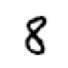

In [21]:
# How does the filename looks like? 
im = PILImageBW.create(item_fns[5]) # 5th filename 
im.show()

Breaking down the above function: 
- `PILImageBW` -> creates a PIL image (accepts a filepath)
- `.create` -> takes care of the preprocessing before going into the model. This is applicable for both X and y, more like a custom implementation for the various inputs. 

Great now lets build a Datasets which expects , 
- the items we want to use 
- the transforms (how the inputs and outputs should be constructed and spits out)
- the type of split (train and test)





In [22]:
dsets  = Datasets(items = item_fns , 
                  tfms = [[PILImageBW.create] , [parent_label , Categorize]] , 
                  splits = splits)

We got our filenames into images, but for a machine learning model we have to convert our images into tensors (numerical representation) and make it easy for our model to learn patterns on it. 

We need to give ourselves some transforms on the data! These will need to:

- Ensure our images are all the same size
- Make sure our output are the tensor our models are wanting
- Give some image augmentation

In [23]:
# Creating transforms for our data by hand (left to right)
tfms = [ToTensor() , CropPad(size = 34 , pad_mode = PadMode.Zeros) , RandomCrop(size = 28)]


We need one more thing atlast, that is transforms applied during the GPU instance or in other words transforms applied for every batches. 

We have to load our **Datasets** into a `DataLoaders` so it will help us to batch our data and sends batch of our whole data during the training time. 

In [24]:
# Creating the batch transforms 
gpu_tfms = [IntToFloatTensor() , Normalize()]

Before the next step, we have to make our data into batches. But why do we need our data in batches? 

Well the importatn reason for having mini-batches is it could run on GPU, so the computations takes places even more faster. 

Also batching prevents the bias during training and helps the trainig converge faster. 



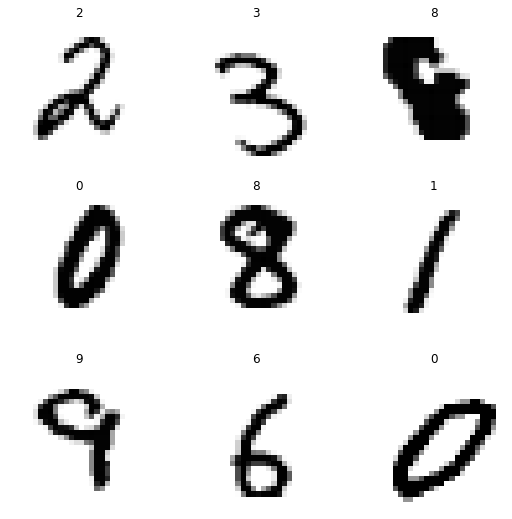

In [25]:
# Building our dataloaders 
dls = dsets.dataloaders(bs = 128 , after_item= tfms , after_batch= gpu_tfms)

# Visualizing the random batch images with transforms 
dls.show_batch()

In [26]:
def conv2(ni , nf):
  return ConvLayer(ni , nf , stride = 2)

In [27]:
# Constructing a simple model 
model = nn.Sequential(
      conv2(1 , 8), 
      conv2(8 ,16), 
      conv2(16 , 32), 
      conv2(32 , 16), 
      conv2(16 , 10), 
      Flatten()
)


In [ ]:
# Creting a learner 
learn = Learner(dls , model , loss_func= CrossEntropyLossFlat() , metrics = accuracy)

# Fitting the model for 3 epochs 
learn.fit_one_cycle(3 , lr_max = 1e-2)

epoch,train_loss,valid_loss,accuracy,time
